<div align='center'>
  Pontifícia Universidade Católica de Minas Gerais</br>
  Programa de Pós-Graduação em Ciência de Dados e Big Data</br>
  Machine Learning
</div>
</br>

<div align='center'>
  <h1><b>Exercício Prático III - Clusterização</b></h1>
</div>
</br>

<div align='right'>
  Aluno: Marco Túlio Barbosa Andrade</br>
  Professor: Cristiano Rodrigues de Carvalho
</div>
</br>

<div align='center'>
  Belo Horizonte</br>
  2022
</div>

## Instalação e importação das bibliotecas

In [3]:
!pip install -U kaleido

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from sklearn.cluster import KMeans

pio.renderers.default = "png"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importação dos dados

**Resumo dos dados:**
- Peso: numérico;
- Colesterol: numérico
- Genero: 0 - feminino, 1 - masculino

In [4]:
df = pd.read_excel('saude.xlsx', index_col=None, header=0)

## Definição da semente

In [5]:
seed = 17

## Análise inicial

In [6]:
# Cabeçalho
df.head(5)

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [7]:
# Rodapé
df.tail(5)

,Peso,Colesterol,Genero
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1
546,148,176,1


In [8]:
# Número de linhas e colunas
df.shape

(547, 3)

In [9]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Peso        547 non-null    int64
 1   Colesterol  547 non-null    int64
 2   Genero      547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [10]:
# Dados faltantes
df.isnull().sum()

Peso          0
Colesterol    0
Genero        0
dtype: int64

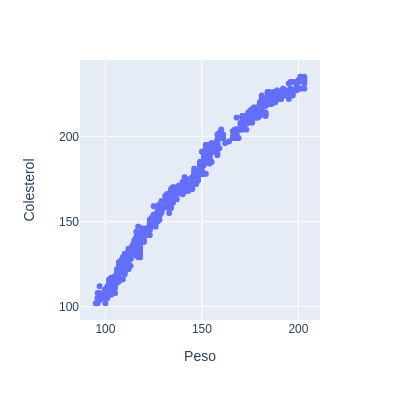

In [11]:
# Scatter plot
fig = px.scatter(df, x='Peso', y="Colesterol", width=400, height=400)
fig.show()

## Estatística descritiva

In [12]:
# Campos numéricos
df.describe()

,Peso,Colesterol,Genero
count,547.000000,547.000000,547.000000
mean,143.572212,170.433272,0.513711
std,30.837275,39.147189,0.500269
min,95.000000,102.000000,0.000000
25%,116.000000,136.000000,0.000000
50%,140.000000,169.000000,1.000000
75%,171.000000,208.000000,1.000000
max,203.000000,235.000000,1.000000


## Preparação dos dados

Como a base de dados possui informações de indivíduos de dois gêneros, obtou-se por dividi-la em duas para que a análise seja mais específica. A princípio, valores referenciais desejáveis de colesterol independem de gênero, porém os pesos médios, em geral, são diferentes.

In [13]:
# Criação do dataset masculino
df_masc = df[df['Genero']==1][['Peso', 'Colesterol']]
df_masc.describe()

,Peso,Colesterol
count,281.000000,281.000000
mean,143.765125,170.032028
std,32.283371,41.152882
min,95.000000,102.000000
25%,115.000000,133.000000
50%,142.000000,172.000000
75%,173.000000,209.000000
max,203.000000,235.000000


In [14]:
# Criação do dataset feminino
df_fem = df[df['Genero']==0][['Peso', 'Colesterol']]
df_fem.describe()

,Peso,Colesterol
count,266.000000,266.000000
mean,143.368421,170.857143
std,29.291630,36.983248
min,96.000000,102.000000
25%,118.000000,140.250000
50%,140.000000,169.000000
75%,163.250000,199.750000
max,203.000000,235.000000


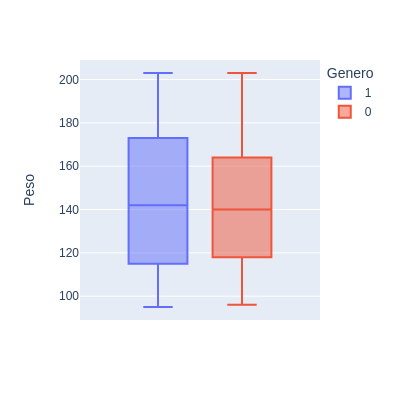

In [15]:
# Boxplot comparativo - Peso
fig = px.box(df, y="Peso", color="Genero", width=400, height=400)
fig.show()

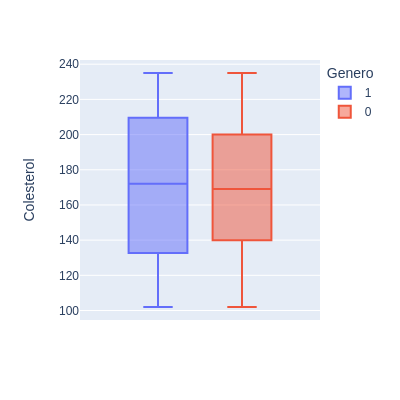

In [16]:
# Boxplot comparativo - Colesterol
fig = px.box(df, y="Colesterol", color="Genero", width=400, height=400)
fig.show()

## Clusterização - K-means (k=2)

In [17]:
# Clusterização - Masculino
k_masc_k2 = KMeans(n_clusters=2, max_iter=500, random_state=seed)
y_masc_k2 = k_masc_k2.fit_predict(df_masc)
y_masc_k2

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [18]:
# Clusterização - Feminino
k_fem_k2 = KMeans(n_clusters=2, max_iter=500, random_state=seed)
y_fem_k2 = k_fem_k2.fit_predict(df_fem)
y_fem_k2

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1], dtype=int32)

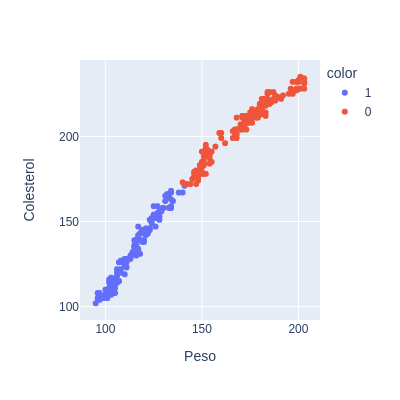

In [19]:
# Scatter Plot clusterizado -  Masculino
fig = px.scatter(df_masc, x='Peso', y="Colesterol", color=y_masc_k2.astype('object'), width=400, height=400)
fig.show()

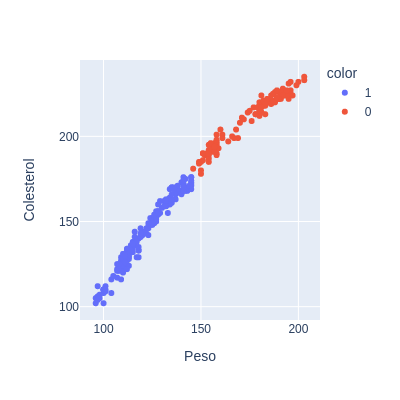

In [20]:
# Scatter Plot clusterizado -  Feminino
fig = px.scatter(df_fem, x='Peso', y="Colesterol", color=y_fem_k2.astype('object'), width=400, height=400)
fig.show()

In [21]:
# Inércia
print('Inércia para k=2 - Masculino: ', k_masc_k2.inertia_)
print('Inércia para k=2 - Feminino: ', k_fem_k2.inertia_)

Inércia para k=2 - Masculino:  160699.6318775966
Inércia para k=2 - Feminino:  157592.7614094548


## Clusterização - K-means (k=3)

In [22]:
# Clusterização - Masculino
k_masc_k3 = KMeans(n_clusters=3, max_iter=500, random_state=seed)
y_masc_k3 = k_masc_k3.fit_predict(df_masc)
y_masc_k3

array([1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0,
       2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2], dtype=int32)

In [23]:
# Clusterização - Feminino
k_fem_k3 = KMeans(n_clusters=3, max_iter=500, random_state=seed)
y_fem_k3 = k_fem_k3.fit_predict(df_fem)
y_fem_k3

array([1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1,
       1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1,
       2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0,
       1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2,
       0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0,
       0, 0], dtype=int32)

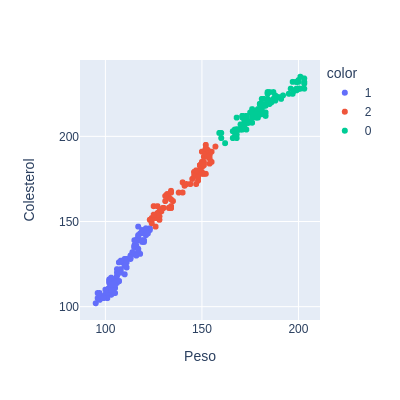

In [24]:
# Scatter Plot clusterizado -  Masculino
fig = px.scatter(df_masc, x='Peso', y="Colesterol", color=y_masc_k3.astype('object'), width=400, height=400)
fig.show()

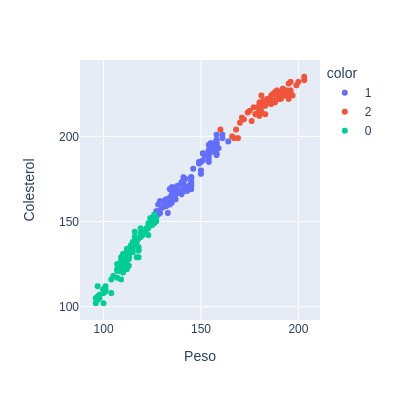

In [25]:
# Scatter Plot clusterizado -  Feminino
fig = px.scatter(df_fem, x='Peso', y="Colesterol", color=y_fem_k3.astype('object'), width=400, height=400)
fig.show()

In [26]:
# Inércia
print('Inércia para k=3 - Masculino: ', k_masc_k3.inertia_)
print('Inércia para k=3 - Feminino: ', k_fem_k3.inertia_)

Inércia para k=3 - Masculino:  71933.62542079209
Inércia para k=3 - Feminino:  65426.516000339136


## Clusterização - K-means (k=4)

In [27]:
# Clusterização - Masculino
k_masc_k4 = KMeans(n_clusters=4, max_iter=500, random_state=seed)
y_masc_k4 = k_masc_k4.fit_predict(df_masc)
y_masc_k4

array([3, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 3, 0, 0,
       2, 1, 0, 0, 2, 0, 2, 1, 2, 3, 0, 2, 3, 2, 1, 1, 3, 3, 0, 1, 3, 1,
       2, 3, 3, 1, 1, 3, 2, 0, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 3, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 2, 1, 1, 3, 1, 0, 1, 3, 1, 2, 3, 3, 1, 1, 3, 2,
       0, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 2, 0,
       2, 2, 3, 3, 0, 3, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 3, 0, 2, 3, 2,
       1, 1, 3, 1, 0, 1, 3, 1, 2, 3, 3, 1, 1, 3, 2, 0, 0, 3, 0, 1, 0, 1,
       3, 3, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 3, 0,
       0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 3, 0, 2, 3, 2, 1, 1, 3, 1, 0, 1, 3,
       1, 2, 3, 3, 1, 1, 3, 2, 0, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 3, 0, 0, 2, 1, 0, 0, 2, 0,
       2, 1, 2, 3, 0, 2, 3, 2, 1, 1, 3, 3, 0, 1, 3, 1, 2], dtype=int32)

In [28]:
# Clusterização - Feminino
k_fem_k4 = KMeans(n_clusters=4, max_iter=500, random_state=seed)
y_fem_k4 = k_fem_k4.fit_predict(df_fem)
y_fem_k4

array([0, 0, 2, 1, 1, 3, 0, 2, 1, 3, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0,
       0, 1, 1, 1, 3, 3, 3, 1, 3, 0, 2, 0, 0, 3, 2, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 0, 2, 0, 3, 2, 1, 1, 3, 0, 2, 1, 3,
       0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 3, 3, 2, 1, 3, 0,
       2, 0, 0, 3, 2, 0, 2, 1, 0, 1, 0, 0, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1,
       0, 2, 0, 3, 2, 1, 1, 3, 0, 2, 1, 3, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2,
       0, 0, 0, 1, 1, 1, 3, 3, 2, 1, 3, 0, 2, 0, 0, 3, 2, 0, 2, 1, 0, 1,
       0, 0, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 0, 2, 0, 3, 2, 1, 1, 3, 0, 2,
       1, 3, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 3, 3, 2, 1,
       3, 0, 2, 0, 0, 3, 2, 0, 2, 1, 0, 0, 0, 0, 1, 3, 2, 1, 3, 1, 2, 1,
       1, 1, 0, 2, 0, 3, 2, 1, 1, 3, 0, 2, 1, 3, 0, 3, 1, 0, 2, 1, 2, 2,
       0, 2, 0, 0, 0, 1, 1, 1, 3, 3, 2, 1, 3, 0, 2, 0, 0, 3, 2, 0, 2, 1,
       0, 0], dtype=int32)

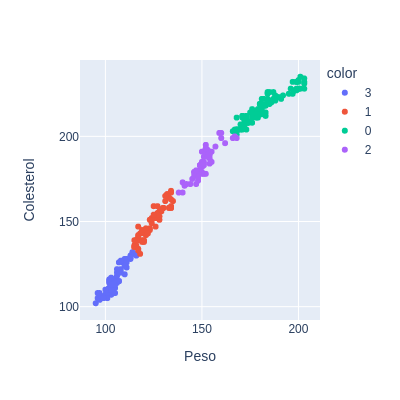

In [29]:
# Scatter Plot clusterizado -  Masculino
fig = px.scatter(df_masc, x='Peso', y="Colesterol", color=y_masc_k4.astype('object'), width=400, height=400)
fig.show()

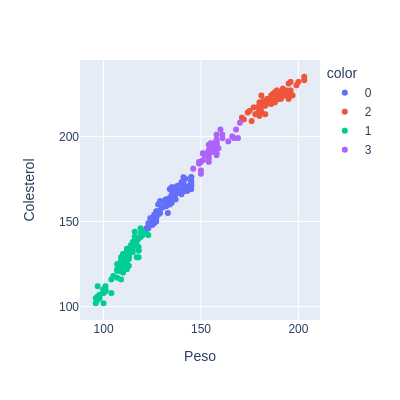

In [30]:
# Scatter Plot clusterizado -  Feminino
fig = px.scatter(df_fem, x='Peso', y="Colesterol", color=y_fem_k4.astype('object'), width=400, height=400)
fig.show()

In [31]:
# Inércia
print('Inércia para k=2 - Masculino: ', k_masc_k4.inertia_)
print('Inércia para k=2 - Feminino: ', k_fem_k4.inertia_)

Inércia para k=2 - Masculino:  40620.29378930679
Inércia para k=2 - Feminino:  32765.30789333617


## Análise dos resultados

A partir da análise inicial dos dados, percebe-se que o colesterol e o peso dos indivíduos são variáveis com considerável correlação positiva, sendo difícil a separação de grupos de indivíduos com apenas o peso ou apenas o colesterol alto.

Ao aplicar o algoritmo K-means com k=2, obteve-se um limiar entre os grupos de maior e menor risco de aproximadamente 140 (peso)/ 170 (colesterol) para o gênero masculino, e de aproximadamente 145 (peso) / 180 (colesterol) para o gênero feminino. Além disso, verificou-se que é possível realizar um agrupamento mais consiso, já que é visualmente perceptível a existência de subgrupos dentro do grupo de maior risco principalmente.

Ao aplicar o algoritmo K-means com k=4, notou-se uma melhor separação do terceiro grupo em relação ao segundo e ao quarto, uma vez que há maiores distâncias entre tais pontos para os demais. Além disso, a inércia do modelo foi reduzida consideravelmente. Entretanto, a diferenciação entre o primeiro e o segundo grupo não é tão clara. Os limites aproximados de separação entre os grupos para cada gênero são apresentados a seguir:

- Masculino:
 - Primeiro grupo: Peso < 115 / Colesterol < 130
 - Segundo grupo: 115 < Peso < 135 / 130 < Colesterol < 170
 - Terceiro grupo: 135 < Peso < 165 / 170 < Colesterol < 200
 - Quarto grupo: Peso > 165 / Colesterol > 200

- Feminino:
 - Primeiro grupo: Peso < 125 / Colesterol < 145
 - Segundo grupo: 125 < Peso < 145 / 145 < Colesterol < 175
 - Terceiro grupo: 145 < Peso < 170 / 175 < Colesterol < 210
 - Quarto grupo: Peso > 170 / Colesterol > 210

Observação: A relação dos grupos foi descrita considerando ordenação ascendente de risco cardíaco.